In [16]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
import spacy
from scipy.sparse import hstack
import joblib

In [ ]:
import csv
csv.field_size_limit(sys.maxsize)

NameError: name 'csv' is not defined

In [53]:
csv.field_size_limit(1_000_000_000)

# Now read the file
# df = pd.read_csv(r'E:\Phising_detection\dataset\emails\CEAS_08.csv', engine='python')
import pandas as pd

# Example: Load multiple CSV files
df1 = pd.read_csv(r'E:\Phising_detection\dataset\emails\TREC_05.csv', engine='python')
df2 = pd.read_csv(r'E:\Phising_detection\dataset\emails\TREC_06.csv', engine='python')
df3 = pd.read_csv(r'E:\Phising_detection\dataset\emails\TREC_07.csv', engine='python')

# ✅ Merge (concatenate) the datasets
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# ✅ Drop duplicate rows (optional)
merged_df = merged_df.drop_duplicates()

# ✅ Drop rows with NaNs (optional)
merged_df = merged_df.dropna()

# ✅ Save to a new file (optional)
# merged_df.to_csv("merged_dataset.csv", index=False)

# Check the result
print(merged_df.shape)
print(merged_df.head())


(120105, 7)
                                              sender  \
0                 "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1                   "Webb, Jay" <Jay.Webb@ENRON.com>   
2               "Symms, Mark" <Mark.Symms@ENRON.com>   
3             "Thorne, Judy" <Judy.Thorne@ENRON.com>   
4  "Williams, Jason R (Credit)" <Jason.R.Williams...   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   
3  "Grass, John" <John.Grass@ENRON.com>, "Nemec, ...   
4  "Nemec, Gerald" <Gerald.Nemec@ENRON.com>, "Dic...   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   
3  Fri, 29 Jun 2001 10:35:17 -0500   
4  Fri, 29 Jun 2001 10:40:02 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily L

In [54]:
df= merged_df

In [55]:
df.dropna(inplace=True)

In [56]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr PW: bnaweb22 -----O...,0.0,1.0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0.0,0.0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0.0,1.0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald, We are currently trading under GT...",0.0,0.0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0.0,0.0


In [57]:
df['label'].unique()

array([0., 1.])

In [ ]:
def clean_text(text):
    text = re.sub(r'\n', ' ', str(text))
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(rf"[{string.punctuation}]", "", text)
    return text.strip()
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# def preprocess(text):
#     text = clean_text(text)
#     doc = nlp(text)
#     return " ".join([
#         token.lemma_ for token in doc
#         if token.is_alpha and not token.is_stop and len(token) > 1
#     ])

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     13462
         1.0       0.98      0.98      0.98     10559

    accuracy                           0.98     24021
   macro avg       0.98      0.98      0.98     24021
weighted avg       0.98      0.98      0.98     24021

ROC AUC: 0.9984089268739447


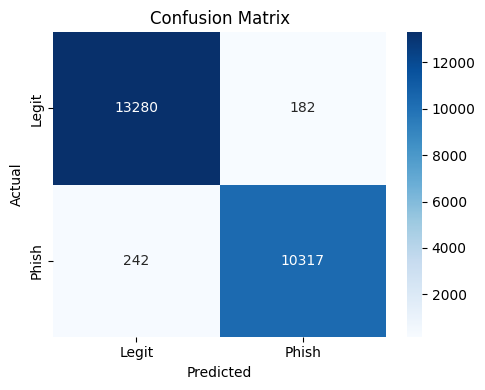

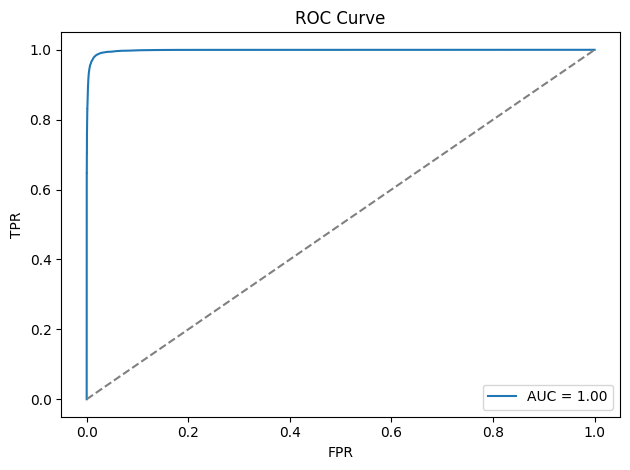

['tfidf_body.pkl']

In [59]:
# -------------------- TF-IDF Vectorization --------------------
subject_vectorizer = TfidfVectorizer(max_features=1000)
body_vectorizer = TfidfVectorizer(max_features=4000)

X_subject = subject_vectorizer.fit_transform(df["subject"])
X_body = body_vectorizer.fit_transform(df["body"])

X_combined = hstack([X_subject, X_body])
y = df["label"]

# -------------------- Train/Test Split --------------------
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=42)

# -------------------- Train Random Forest --------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# -------------------- Evaluate --------------------
y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))

# -------------------- Confusion Matrix --------------------
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Phish'], yticklabels=['Legit', 'Phish'])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.tight_layout(); plt.show()

# -------------------- ROC Curve --------------------
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve")
plt.legend(); plt.tight_layout(); plt.show()

# -------------------- Save Model and Vectorizers --------------------
joblib.dump(clf, "rf_email_model.pkl")
joblib.dump(subject_vectorizer, "tfidf_subject.pkl")
joblib.dump(body_vectorizer, "tfidf_body.pkl")
